# Import all important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Now i load and do some basic analysis on my dataset

In [2]:
df = pd.read_csv("hf://datasets/scikit-learn/churn-prediction/dataset.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df = df.drop(columns  = ["customerID"])

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 20)

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.duplicated().sum()

22

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(7021, 20)

In [14]:
cat_col_name = df.select_dtypes(include = ["object"]).columns.tolist()
num_col_name = df.select_dtypes(include = ["int64","float64"]).columns.tolist()

In [15]:
cat_col = df[cat_col_name]
num_col_name = df[num_col_name]

In [16]:
cat_col

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [17]:
from sklearn.preprocessing import LabelEncoder


In [18]:
label = LabelEncoder()
for col in cat_col_name:
    df[col] = label.fit_transform(df[col])

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
num_col_name

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [22]:
scaler = StandardScaler()

In [23]:
df[["tenure","MonthlyCharges"]] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.282728,0,1,0,0,2,0,0,0,0,0,1,2,-1.164135,2505,0
1,1,0,0,0,0.062387,1,0,0,2,0,2,0,0,0,1,0,3,-0.262811,1466,0
2,1,0,0,0,-1.241967,1,0,0,2,2,0,0,0,0,0,1,3,-0.365914,157,1
3,1,0,0,0,0.510759,0,1,0,2,0,2,2,0,0,1,0,0,-0.750058,1400,0
4,0,0,0,0,-1.241967,1,0,1,0,0,0,0,0,0,0,1,2,0.194503,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.345224,1,2,0,2,0,2,2,2,2,1,1,3,0.663458,1597,0
7039,0,0,1,1,1.611307,1,2,1,0,2,2,0,2,2,1,1,1,1.275428,5698,0
7040,0,0,1,1,-0.875118,0,1,0,2,0,0,0,0,0,0,1,2,-1.172450,2994,0
7041,1,1,1,0,-1.160445,1,2,1,0,0,0,0,0,0,0,1,3,0.317562,2660,1


In [25]:
churn_counts = df["Churn"].value_counts()

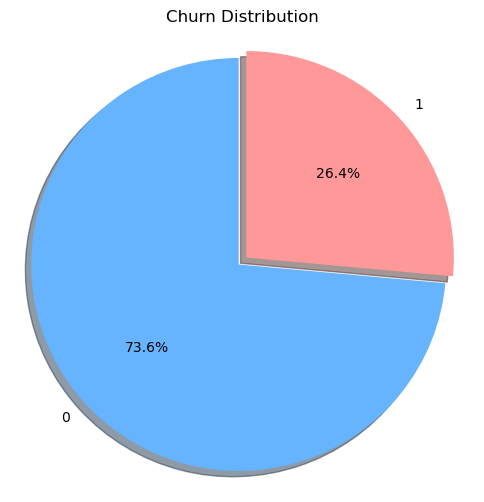

In [26]:
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0)  # Slightly explode first slice

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)
plt.title("Churn Distribution")
plt.axis('equal')
plt.show()

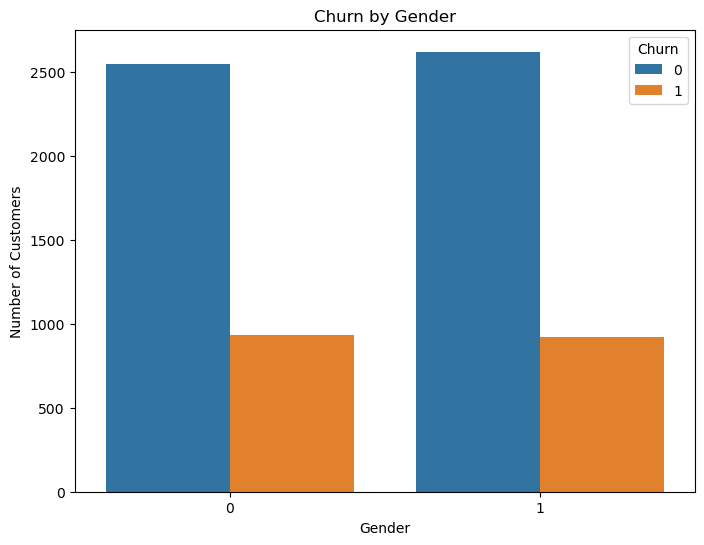

In [27]:
# Now i check is there any relation between gender and churning

# Plot count of churned vs not churned by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

In [28]:
# now i split my data into training and testing 
from sklearn.model_selection import train_test_split
x = df.drop(columns = ["Churn"])
y = df["Churn"]
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [29]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100,random_state =  42)

In [30]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)

Confusion Matrix:
 [[1167  127]
 [ 244  218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.63      0.47      0.54       462

    accuracy                           0.79      1756
   macro avg       0.73      0.69      0.70      1756
weighted avg       0.78      0.79      0.78      1756


Accuracy: 0.7887243735763098


In [34]:
# now i want to use xgboost 
import xgboost as xgb
# Initialize model (you can tweak hyperparameters)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
y_pred = xgb_model.predict(x_test)

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)

Confusion Matrix:
 [[1131  163]
 [ 218  244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1294
           1       0.60      0.53      0.56       462

    accuracy                           0.78      1756
   macro avg       0.72      0.70      0.71      1756
weighted avg       0.78      0.78      0.78      1756


Accuracy: 0.7830296127562643


In [37]:
# now i want to use light gbm model
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [38]:
import lightgbm as lgb

# Initialize the LightGBM classifier
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 1395, number of negative: 3870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5265, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264957 -> initscore=-1.020360
[LightGBM] [Info] Start training from score -1.020360


LGBMClassifier(random_state=42)

In [39]:
y_pred = lgbm_model.predict(x_test)

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)

Confusion Matrix:
 [[1150  144]
 [ 213  249]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1294
           1       0.63      0.54      0.58       462

    accuracy                           0.80      1756
   macro avg       0.74      0.71      0.72      1756
weighted avg       0.79      0.80      0.79      1756


Accuracy: 0.7966970387243736


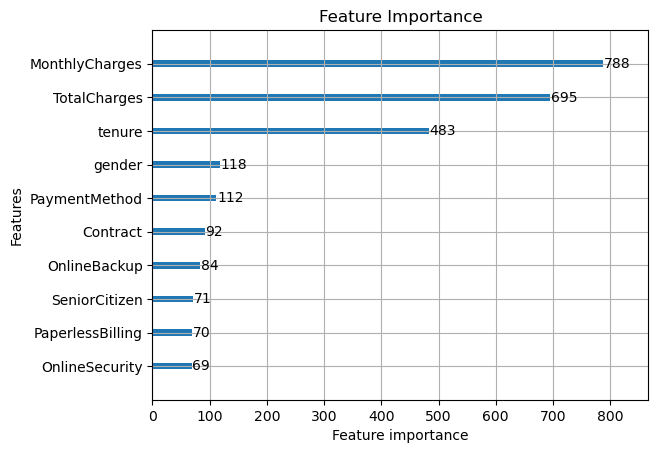

In [41]:
# import matplotlib.pyplot as plt

lgb.plot_importance(lgbm_model, max_num_features=10)
plt.title("Feature Importance")
plt.show()
